<a href="https://colab.research.google.com/github/HelliosClub/Creditcard_data_Analysis/blob/main/creditcard_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import zipfile
import os

zip_path = "/content/creditcard.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

print("압축 해제 완료")

압축 해제 완료


In [13]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
print ("Volume of dataset", df.shape)
print("length of columns", len(df.columns))
print("Name of columns", df.columns.tolist())

Volume of dataset (284807, 31)
length of columns 31
Name of columns ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [15]:
print("data type of each columns:", df.dtypes)
print("\nNumber of NaN:",df.isnull().sum().sort_values(ascending=False).head())

data type of each columns: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Number of NaN: Time    0
V1      0
V2      0
V3      0
V4      0
dtype: int64


<ipython-input-19-ee91bf72d83e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette = 'Set2')


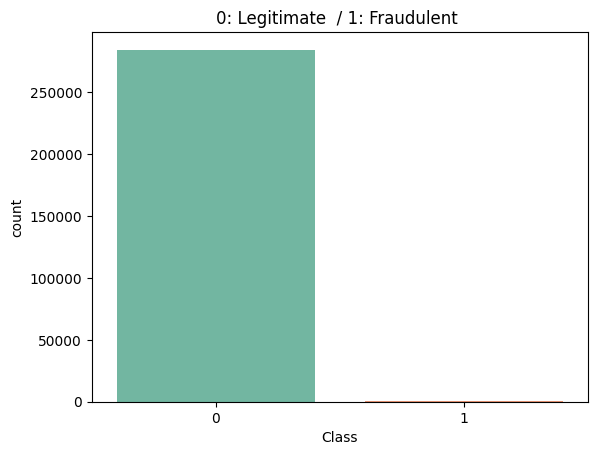

,proportion
Class,
0,0.998273
1,0.001727


In [19]:
##데이터 시각화

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class', palette = 'Set2')
plt.title("0: Legitimate  / 1: Fraudulent ")
plt.show()

df['Class'].value_counts(normalize = True)

In [20]:
fraudulent = df[df['Class'] == 1]
legitimate = df[df['Class'] == 0]

print(f"Number of normal transaction: {len(legitimate)}")
print(f"Number of fraud transaction: {len(fraudulent)}")

Number of normal transaction: 284315
Number of fraud transaction: 492


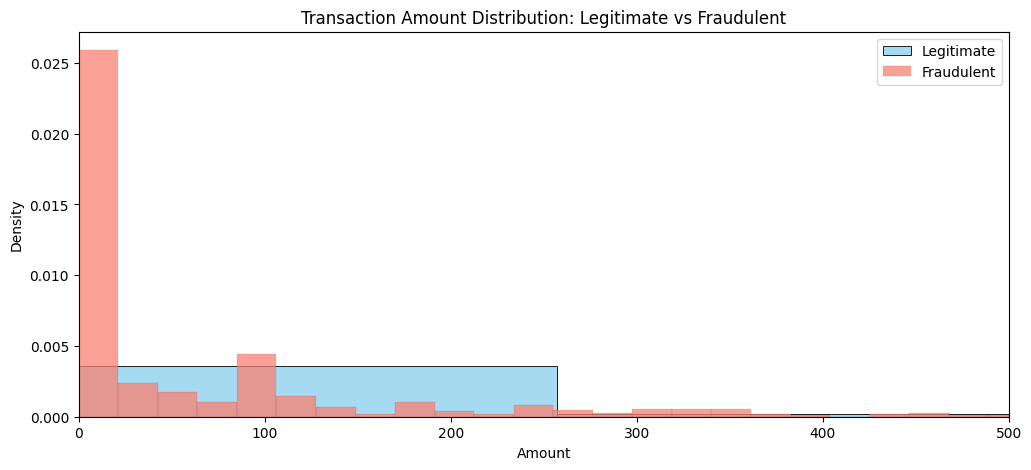

In [22]:
plt.figure(figsize=(12,5))

# 정상 거래
sns.histplot(normal['Amount'], bins=100, color='skyblue', label='Legitimate', stat='density')
# 사기 거래
sns.histplot(fraud['Amount'], bins=100, color='salmon', label='Fraudulent', stat='density')

plt.legend()
plt.title("Transaction Amount Distribution: Legitimate vs Fraudulent")
plt.xlabel("Amount")
plt.ylabel("Density")
plt.xlim(0,500)
plt.show()


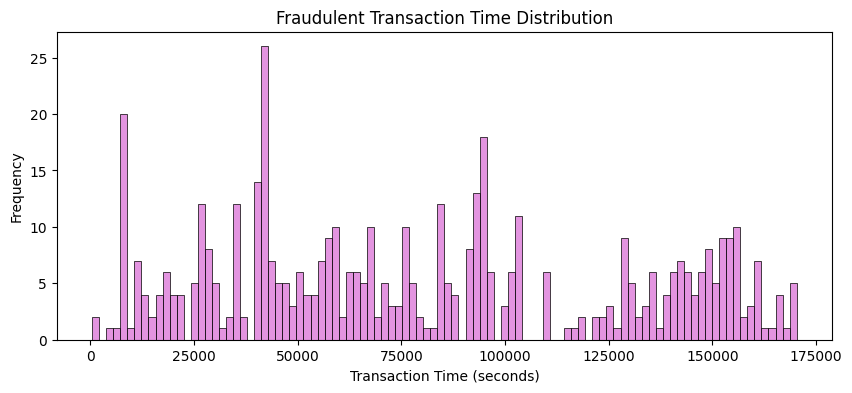

In [24]:
plt.figure(figsize=(10,4))
sns.histplot(fraud['Time'], bins=100, color='orchid')
plt.title("Fraudulent Transaction Time Distribution")
plt.xlabel("Transaction Time (seconds)")
plt.ylabel("Frequency")
plt.show()

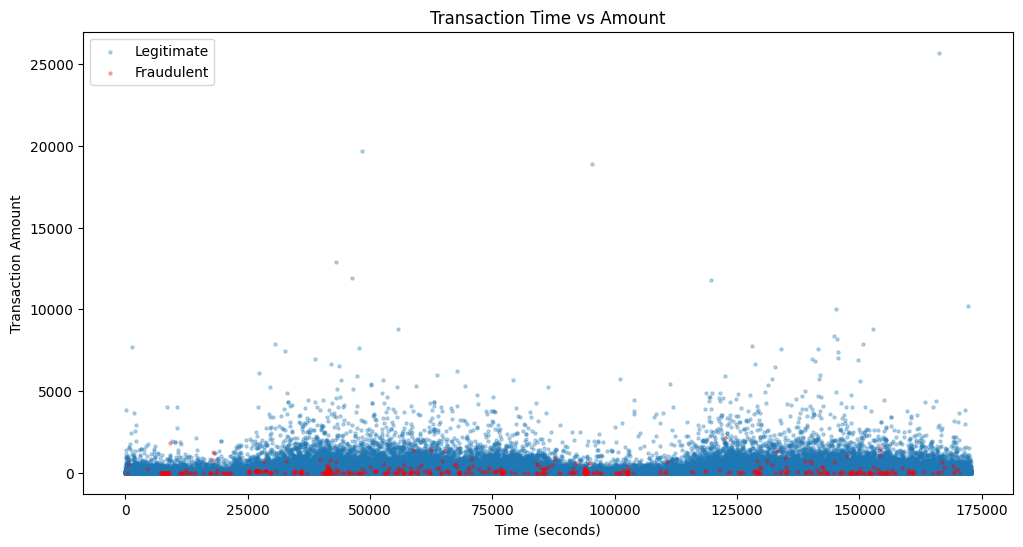

In [25]:
plt.figure(figsize=(12,6))

plt.scatter(normal['Time'], normal['Amount'], alpha=0.3, label='Legitimate', s=5)
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.3, label='Fraudulent', s=5, color='red')

plt.title("Transaction Time vs Amount")
plt.xlabel("Time (seconds)")
plt.ylabel("Transaction Amount")
plt.legend()
plt.show()

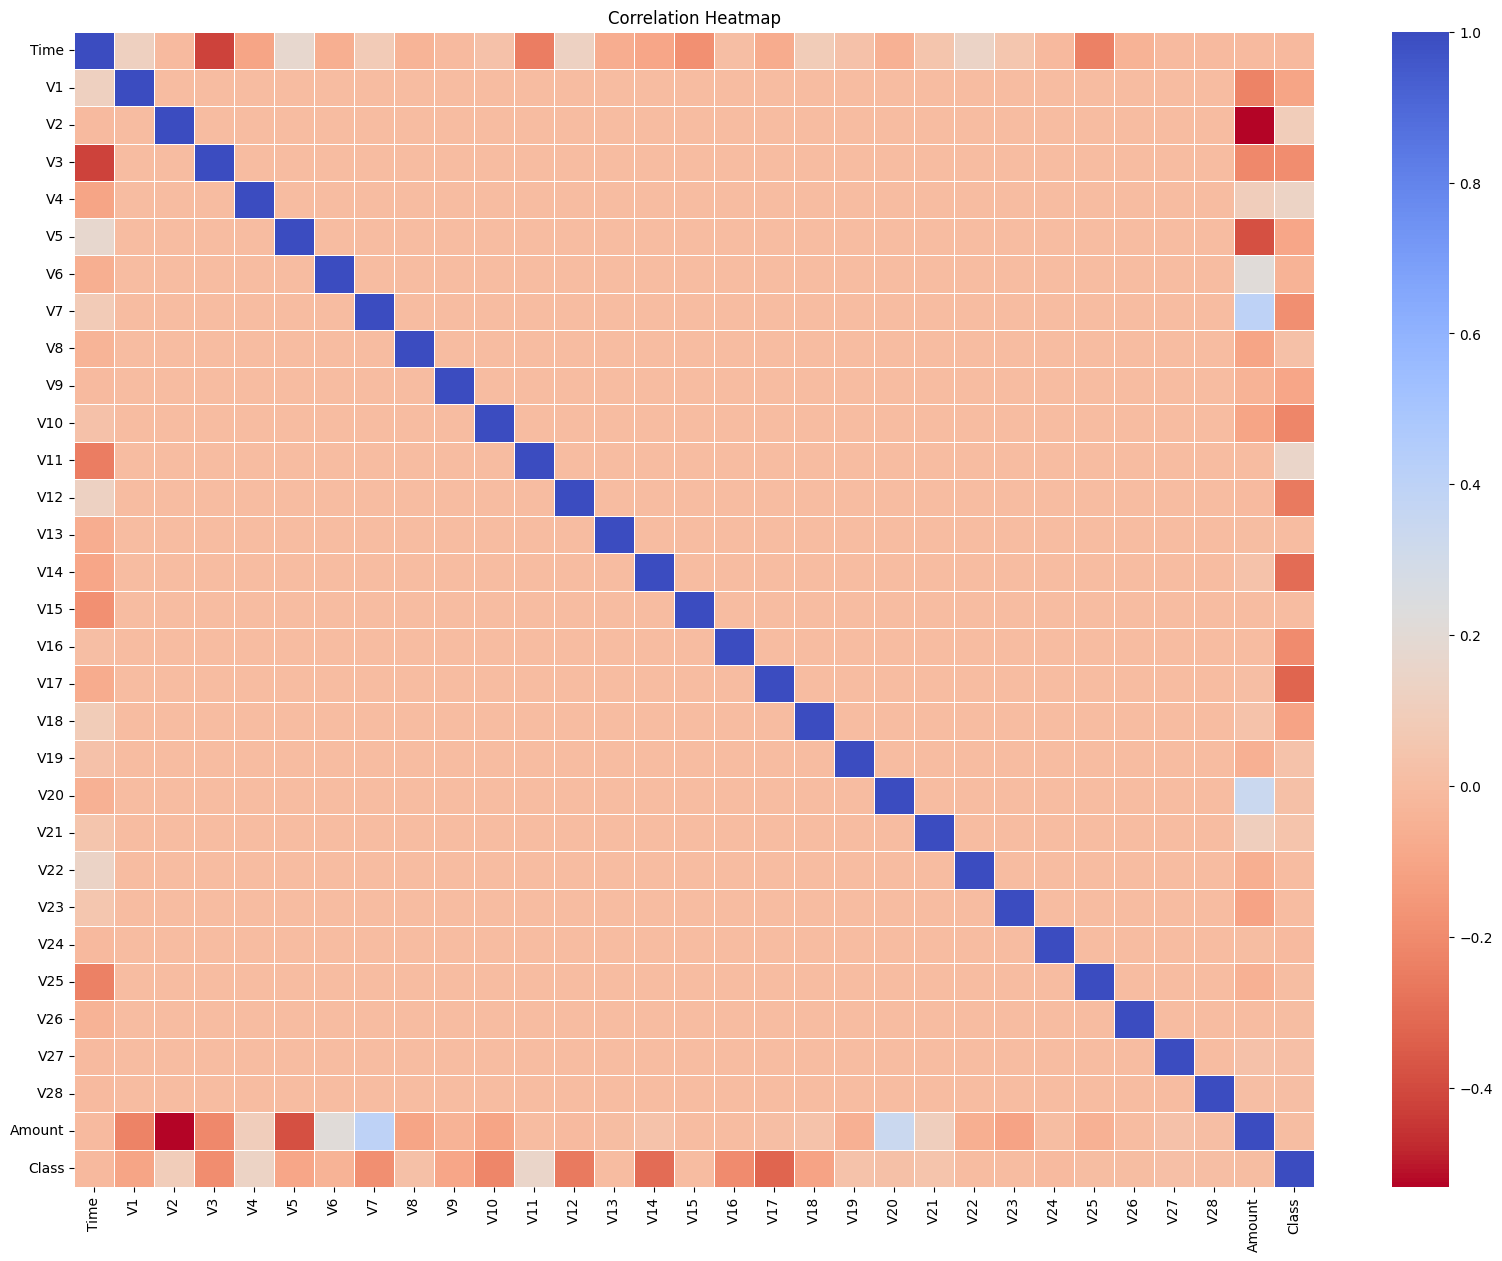

In [26]:
plt.figure(figsize=(20,15))
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm_r', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [27]:
target_corr = corr['Class'].drop('Class').sort_values(key=abs, ascending=False)
print(target_corr.head(10))

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64
